# Variations in T_min and T_max for each day of years

An NOAA dataset used as the dataset. This data comes from The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily encompasses daily climate records from many land surface stations worldwidew.

This task was an assignment asked for visualization course in Michigan Data Science specialization in coursera.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, I did:

1. Read the documentation and familiarize myself with the dataset, then wrote some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014.
2. Overlaid a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.


The data I have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [6]:
# Importing some libraries and Magics
import os
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import warnings


warnings.filterwarnings('ignore')

%matplotlib notebook

In [12]:
# Reading comma separated file and Extracting Temperature Extremes
# Dates are also converted into DateTime type
path = 'assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
df = pd.read_csv(path)
dates = list(map(pd.to_datetime, df['Date']))
df['Dates'] = dates
df['Data_Value']=df['Data_Value']/10
tmax_total = df[df['Element']=='TMAX']
tmin_total = df[df['Element']=='TMIN']

In [13]:
# Separating the Period into 2
tmax_2015 = tmax_total[tmax_total['Dates']>='2015-01-01']
tmin_2015 = tmin_total[tmin_total['Dates']>='2015-01-01']
tmax = tmax_total[tmax_total['Dates']<'2015-01-01']
tmin = tmin_total[tmin_total['Dates']<'2015-01-01']

In [14]:
# Grouping data by Date
tmax = tmax.groupby("Dates").max()
tmin = tmin.groupby("Dates").min()

In [15]:
# Adding day of year ('doy') column into dfs
tmax['doy']= pd.DatetimeIndex(tmax.index).dayofyear
tmin['doy']= pd.DatetimeIndex(tmin.index).dayofyear

In [16]:
tmax_2015['doy']= pd.DatetimeIndex(tmax_2015.Dates).dayofyear
tmin_2015['doy']= pd.DatetimeIndex(tmin_2015.Dates).dayofyear
tmax_2015 = tmax_2015.iloc[:,[3,-1]]
tmin_2015 = tmin_2015.iloc[:,[3,-1]]

In [17]:
tmax_2015 = tmax_2015.groupby('doy').max()
tmin_2015 = tmin_2015.groupby('doy').min()

In [18]:
tmax

,ID,Date,Element,Data_Value,doy
Dates,,,,,
2005-01-01,USW00094889,2005-01-01,TMAX,15.6,1
2005-01-02,USW00094889,2005-01-02,TMAX,13.9,2
2005-01-03,USW00094889,2005-01-03,TMAX,13.3,3
2005-01-04,USW00094889,2005-01-04,TMAX,3.9,4
2005-01-05,USW00094889,2005-01-05,TMAX,3.3,5
...,...,...,...,...,...
2014-12-27,USW00094889,2014-12-27,TMAX,11.1,361
2014-12-28,USW00094889,2014-12-28,TMAX,13.3,362
2014-12-29,USW00094889,2014-12-29,TMAX,8.9,363


In [19]:
tmax = tmax.groupby('doy').max()
tmin = tmin.groupby('doy').min()

In [20]:
# Outliers
differ_min = tmin.subtract(tmin_2015,axis='index').iloc[:,0]
new_records_min = differ_min[differ_min>0].index
new_records_min

Int64Index([  5,  11,  34,  45,  46,  47,  48,  50,  51,  52,  54,  55,  56,
             57,  58,  59,  64,  65,  66,  87,  88,  89, 114, 115, 153, 184,
            191, 240, 290, 291, 292, 294],
           dtype='int64', name='doy')

In [21]:
differ_max = tmax.subtract(tmax_2015,axis='index').iloc[:,0]

new_records_max = differ_max[differ_max<0].index
new_records_max

Int64Index([ 40, 107, 127, 128, 131, 138, 208, 210, 250, 259, 260, 261, 271,
            272, 293, 306, 307, 308, 309, 322, 341, 342, 343, 344, 345, 346,
            347, 348, 349, 350, 357, 358, 359, 360],
           dtype='int64', name='doy')

In [22]:
df = pd.merge(tmax, tmin , how='outer',right_index=True, left_index=True)

In [23]:
df = df.iloc[:,[3,7]]
df.rename(columns={'Data_Value_x': 't_max'
                   , 'Data_Value_y': 't_min'}, inplace=True)

<IPython.core.display.Javascript object>


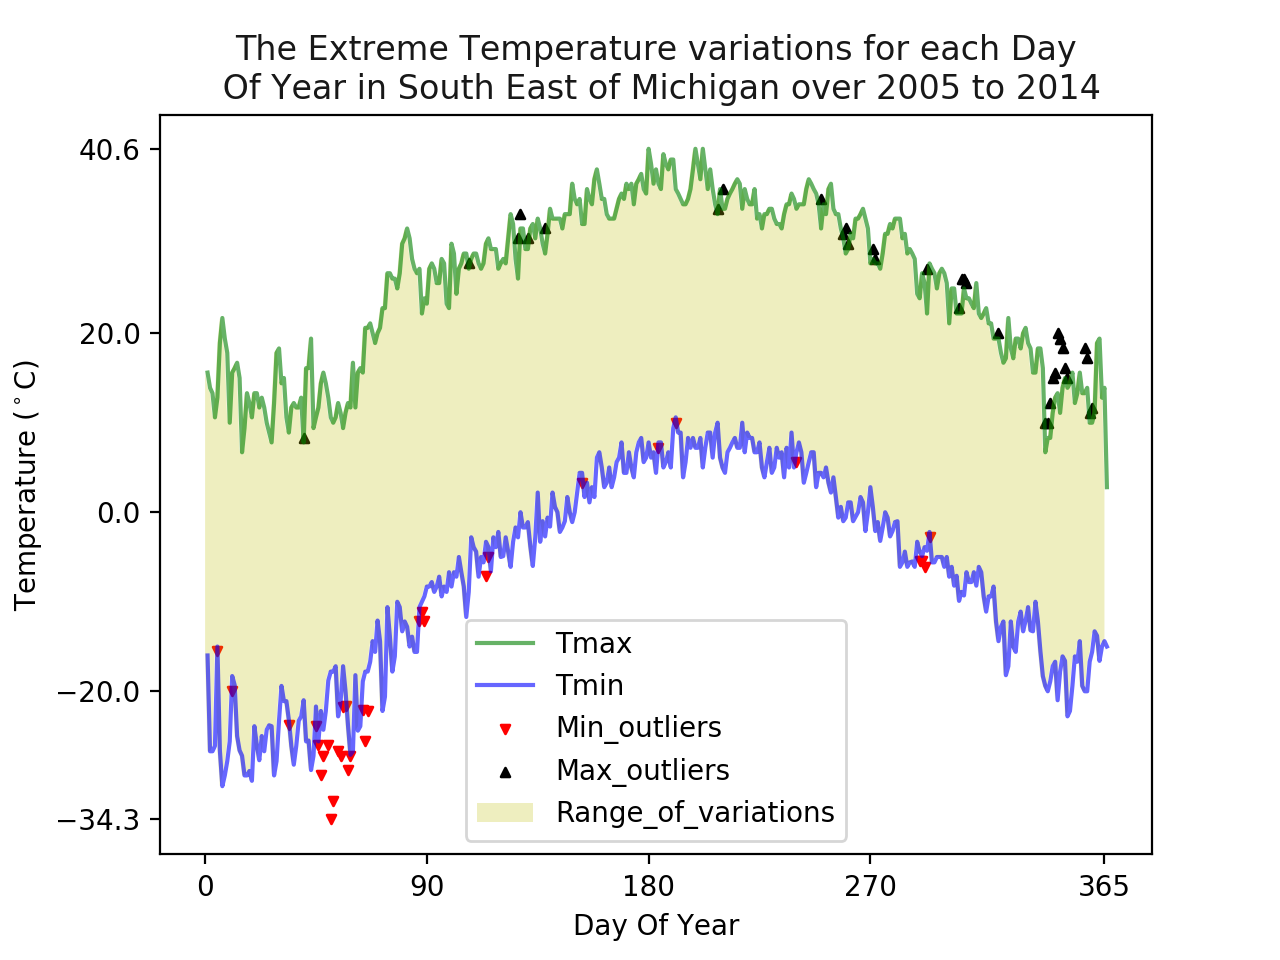

In [14]:
plt.figure()
plt.xticks([0,90,180, 270,365])
plt.plot(df['t_max'], '-g', df['t_min'], '-b', alpha=0.6)

In [15]:
plt.scatter(new_records_min, tmin_2015.loc[new_records_min],
            marker='v',s=10, c='red')
plt.scatter(new_records_max, tmax_2015.loc[new_records_max],
            marker='^',s=10, c='black')

In [16]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(df['t_max'])), 
                       df['t_min'], df['t_max'], 
                       facecolor='y', 
                       alpha=0.25)

In [17]:
txt = 'The Extreme Temperature variations for each Day\n Of Year in South East of Michigan over 2005 to 2014'
plt.xlabel('Day Of Year')
plt.ylabel('Temperature ($^\circ$C)')
plt.title(txt, alpha=0.9)

# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Tmax', 'Tmin','Min_outliers','Max_outliers', 'Range_of_variations'])


In [18]:
plt.yticks([tmin_2015.min()['Data_Value'], -20, 0, 20,tmax.max()['Data_Value']])

([<matplotlib.axis.YTick at 0x7f4af81bed30>,
 <a list of 5 Text yticklabel objects>)

### Reference:
Menne, M.J., I. Durre, R.S. Vose, B.E. Gleason, and T.G. Houston, 2012:  An overview 
of the Global Historical Climatology Network-Daily Database.  Journal of Atmospheric 
and Oceanic Technology, 29, 897-910, doi:10.1175/JTECH-D-11-00103.1.